<a href="https://colab.research.google.com/github/Baroka-wp/dive_ML/blob/master/Sprint3_Regression_lineaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random


In [ ]:
#creer une dataset
random.seed(0)
x, y = make_regression(n_samples=100, n_features=1,noise=10)
y = y.reshape(y.shape[0],1)

print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


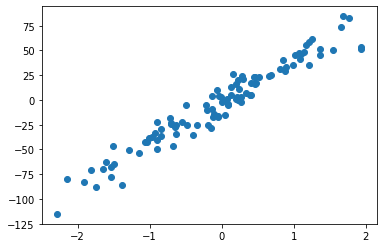

In [ ]:
plt.scatter(x,y)
plt.show()

## 【problem1】Hypothetical function


In [ ]:
#ajouter la colonne des biais theta
n_features = x.shape[1]
n_samples = x.shape[0]
no_bias = False
if not no_bias:
  X = np.hstack((x, np.ones(x.shape)))

print(X.shape)

(100, 2)


Initialiser theta (les coeficients)

In [ ]:
np.random.seed(0)
theta = np.random.randn(n_features + (1 - no_bias),1)

print(theta)

[[1.76405235]
 [0.40015721]]


image.png

In [ ]:
def linear_hypothesis(X, theta):
    """
    Compute a linear hypothetical function

    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data

    Returns
    -------
      The following form of ndarray, shape (n_samples, 1)
      Estimated result by linear hypothetical function

    """
    return X.dot(theta)

(100, 1)


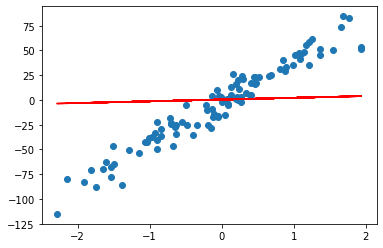

In [ ]:
model = linear_hypothesis(X, theta)
print(model.shape)
plt.scatter(x,y)
plt.plot(x, model, c="r")
plt.show()

## 【problem 5】Objective function


Fonction Cout : Erreur Quadratique moyenne

image.png

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((linear_hypothesis(X, theta) - y)**2)

In [ ]:
cost_function(X, y, theta)

791.1714987711653

##【problem2】Steepest descent


 on calcule du gradient

image.png

In [ ]:
def gradien(X,y,theta):
  """
  Nous allons d'abord créer la function de gradient
  c'est la derivé de la function de cout
  """
  m = len(y)
  return X.T.dot(linear_hypothesis(X, theta) - y)/m


In [ ]:
gradien(X,y,theta).shape

(2, 1)

Algorithme de descente de gradient

image.png

In [ ]:
def gradient_descent(X, y,theta,iter,lr):
    """
    n_iteration : c'est le nombre d'iteration
    learning_rate : c'est le alphat, le coeficiet d'apprentissage
    """
    val_loss = np.zeros(iter)# creer un tabeau des evolution de la fonction cout
    for i in range(0,iter):
      theta = theta - lr * gradien(X,y,theta)
      val_loss[i] = cost_function(X, y, theta) # on enregistre la valeur du cout au tour i dans cost_history[i]

    plt.plot(range(iter), val_loss)
    plt.show()

    return theta,val_loss

##【Problem 7】Learning curve plot


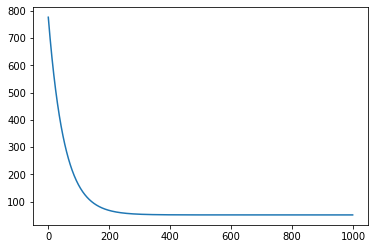

[[41.24041259]
 [-2.2406984 ]]


In [ ]:
theta_final,val_loss = gradient_descent(X, y, theta, iter=1000, lr=0.01)

print(theta_final)

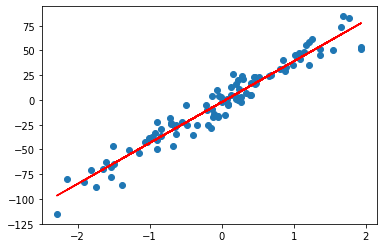

In [ ]:
plt.scatter(x,y)
plt.plot(x, linear_hypothesis(X, theta_final), c="r")
plt.show()

## 【problem 3】Estimated


In [ ]:
def prediction(X, theta_final):

  return linear_hypothesis(X, theta_final)

In [ ]:
pred = prediction(X, theta_final)

##【problem 4】Mean squared error


In [ ]:
def MSE(y, pred):
  """
    Calculation of mean square error

    Parameters
    ----------
    y_pred : ndarray, shape (n_samples,)
      Estimated value
    y : ndarray, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse : numpy.float
      Mean squared error
  """
  u = np.sum((y-pred)**2)
  v = np.sum((y-y.mean())**2)
  return 1 - u/v

In [ ]:
print(MSE(y, pred))

0.9396129361353202


## Scratch Linear Regression


In [ ]:
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    
    def __init__(self, num_iter, lr, no_bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered, 
        the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : ndarray, shape (n_samples,)
            Correct value of verification data
        """
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        if not no_bias:
          X = np.hstack((X, np.ones((n_samples,1)))) # ajouter le bias column to X
          self.theta = np.random.randn(n_features+1,1) # Prepare theta for hypotheis function
        else:
          self.theta = np.random.randn(n_features,1)
        
      
        # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
        cost_history = np.zeros(self.iter)

        for i in range(0, self.iter):
          hyp = self._linear_hypothesis(X)
          grad = self._grad(X,y,hyp)
          self.theta = self._gradient_descent(grad) # mise a jour du parametre theta (formule du gradient descent)
          cost_history[i] = cost_function(X, y, self.theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
        print("####learning curve####")
        plt.plot(range(self.iter),cost_history, c="r", linewidth=2)
        plt.show()
        
        if self.verbose:
            #Output learning process when verbose is set to True
            print("theta: {}".format(self.theta))
            print("Val_loss: {}".format(self.val_loss))
        pass

    def _linear_hypothesis(self, X):
      """
        Compute a linear hypothetical function

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data

        Returns
        -------
          The following form of ndarray, shape (n_samples, 1)
          Estimated result by linear hypothetical function

      """
      hyp = X.dot(self.theta)
      return hyp

    def _grad(self,X, y,hyp):
        m = len(y)
        grad = 1/m * X.T.dot(hyp - y)
        return grad 

    def _gradient_descent(self, grad):
        self.theta = self.theta - self.lr * grad # mise a jour du parametre theta (formule du gradient descent)
        return self.theta
    
    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        if not no_bias:
          X = np.hstack((X, np.ones((n_samples,1))))
        pred = np.dot(X, self.theta)
        return pred

    def _cost_function(self,hyp, y):
        """
        la function de cout sera calculé par 
        la moyenne des distances euclusiennes
        """
        m = len(y)
        loss = 1/(2*m) * np.sum((hyp - y)**2)
        return loss

# Fit Scratch ScratchLinearRegression
 

####learning curve####


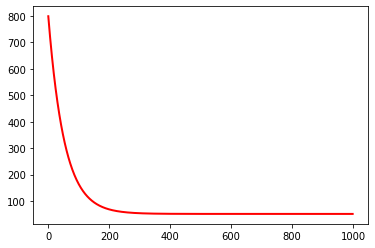

In [ ]:
model = ScratchLinearRegression(1000, 0.01, False, False)
model.fit(x,y)

## Prediction & EVALUATION

In [ ]:
pred1 = model.predict(x)
print(MSE(y,pred1).round(2))

0.94


#### Compare this with the scikit-learn implementation and see if it works correctly.



In [ ]:
reg = LinearRegression().fit(x, y)
print(reg.score(x, y).round(2))

0.94


##【problem 8】(Advance task) Removal of bias term


####learning curve####


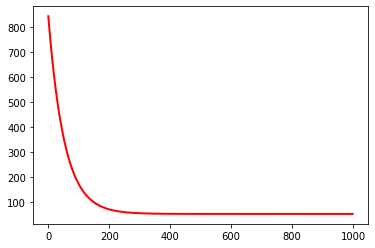

In [ ]:
model2 = ScratchLinearRegression(1000, 0.01, no_bias=True, verbose=False)
model2.fit(x,y)

In [ ]:
pred2 = model2.predict(x)
print(MSE(y,pred2).round(2))

0.94


pour ce jeu de donné, il semble que le score n'a pas changé qu'il y ait ou non le bias.

## [Problem 9] (Advance task) Multidimensional feature quantity

In [ ]:
#creer une dataset
random.seed(1)
x1, y1 = make_regression(n_samples=100, n_features=2,noise=10)
y1 = y1 + abs(y1/2)

y1 = y1.reshape(y1.shape[0],1)

print(y1.shape)
print(x1.shape)


(100, 1)
(100, 2)


####learning curve####


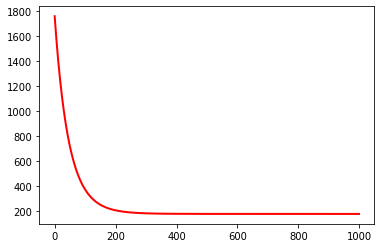

In [ ]:
model3 = ScratchLinearRegression(1000, 0.01, False, False)
model3.fit(x1,y1)

In [ ]:
pred3 = model3.predict(x1)
print(MSE(y1,pred3).round(2))

0.9


#### Model sans bias



####learning curve####


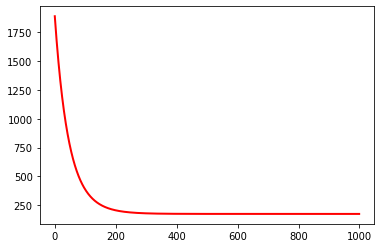

In [ ]:
model4 = ScratchLinearRegression(1000, 0.01, True, False)
model4.fit(x1,y1)

In [ ]:
pred4 = model4.predict(x1)
print(MSE(y1,pred4).round(2))

0.9


##【problème 10】(Tâche avancée) Dérivation de la formule de mise à jour


image.png

C'est l'algorithme de descente de gradient. Il permet de trouver les coefs qui monimise la fonction de cout. 

- Le vecteur <mi>&#x3B8;</mi> est le vecteur des coeficients. 

- alpha est le learning rate qu'on multiplie par le gradient = 1/m * X.T.dot(hyp - y)


##【problem 11】(Advance task) Problem of local optimum solution

Il peut en effet arriver que la fonction admet un minimum local. ce qui peut fausser la descente de gradient comme dans la courbe ci-dessus

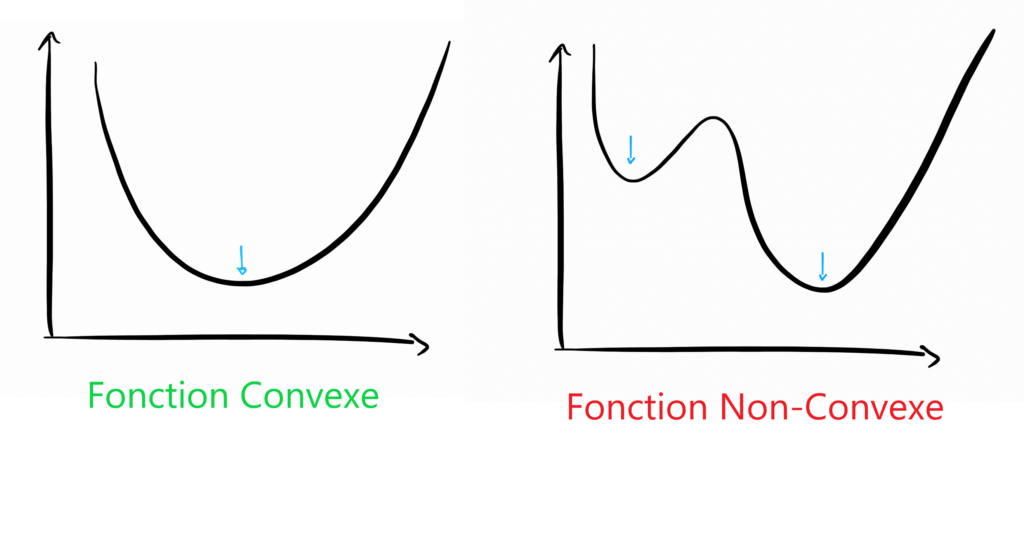